In [2]:
import pickle
import cv2
from math import gcd
import subprocess
import matplotlib.pyplot as plt
import os, shutil, glob
from skimage import measure
import numpy as np
import csv
import math
import operator
plt.rcParams["figure.figsize"] = (20,10)


ModuleNotFoundError: No module named 'cv2'

In [184]:
#data_path = '/Users/dnyanadajoshi/Dropbox/data/'
#ext = '.JPG'
#infile = 'DSC_0630'+ext
#marked = 'DSC_0630_an'+ext
#file_original = 'DSC_0630_transform1'+ext
#file_marked = 'DSC_0630_transform2-ppt'+ext
#infile_cropped = 'DSC_0630_noBg'+ext
ext = '.bmp'
data_path = '/Users/dnyanadajoshi/Dropbox/data/0624/'
subdir = 'NG/'
subdir_cropped = 'NG_cropped/'
original_name = 'NG_3'+ext
marked_name = 'NG_3_checkmark'+ext
file_original = original_name[:-len(ext)] + "_cropped"+ext
file_marked = marked_name[:-len(ext)] + "_cropped"+ext

In [185]:
crop_path_original = data_path+subdir_cropped+original_name[:-4]+'/'
crop_path_marked = data_path+subdir_cropped+marked_name[:-4]+'/'

filtered_original = crop_path_original+'Filtered/'
filtered_marked = crop_path_marked+'Filtered/'
print(filtered_marked)
prefix_original = filtered_original+original_name[:-(len(ext))]+"_offset"
prefix_marked = filtered_marked+marked_name[:-(len(ext))]+"_offset"

/Users/dnyanadajoshi/Dropbox/data/0624/NG_cropped/NG_3_checkmark/Filtered/


In [186]:
#We need to find the centroid of a white blob. For this, we find the grayscale threshold on the cropped images and proceed accordingly

In [187]:
cropped_original = glob.glob(filtered_original+"*"+ext)
cropped_marked = glob.glob(filtered_marked+"*"+ext)

In [188]:
small_cropped_original = cropped_original[:10]
small_cropped_marked = cropped_marked[:10]

In [189]:
def remove_noise(img):
    img = 255 - img 
    kernel = np.ones((3,3),np.float32)
    kernel[1][1] = 0
    dst =cv2.filter2D(img,-1,kernel)
    dst = 255 - dst
    return dst

In [190]:
def detect_color(values, im, delta=10, rgb_select = False, min_sat=100, min_value=100):
    color = np.uint8([[[values[0], values[1], values[2]]]])
    flag = cv2.COLOR_BGR2HSV
    if rgb_select:
            flag = cv2.COLOR_RGB2HSV_FULL
    hsv_color = cv2.cvtColor(color, flag)
    hue = hsv_color[0][0][0]
    #print("Hue: ",hue)
    lower = np.array([(hue-delta), min_sat, min_value])
    upper = np.array([(hue+delta), 255, 255])
    return cv2.inRange(im, lower, upper)

In [191]:
#FINDING CENTROID OF WHITE BLOB
#REFERENCE: https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/

def find_centroid(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh, output = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    bgr_green = [85,114,80]
    green_mask = 255 - detect_color(bgr_green, cv2.cvtColor(img, cv2.COLOR_BGR2HSV), delta=20,min_sat = 10, min_value=10)
    bgr_red = [36,28,237]
    red_mask = detect_color(bgr_red, cv2.cvtColor(img, cv2.COLOR_BGR2HSV), delta=10, min_sat = 100, min_value=100)
    dot_prod = np.multiply(output,green_mask)*255 + red_mask
    M = cv2.moments(dot_prod)
    x = int(M["m10"]/M["m00"])
    y = int(M["m01"]/M["m00"])
    return (x,y)

def split_name(name, prefix):
    
    string = name[len(prefix):][:-len(ext)]
    print(string)
    string = string.split("_")
    print(string)
    return (int(string[0]), int(string[1])), int(string[2])
    
def get_centroid_list(files, prefix):
    
    centroids = []
    for f in files:
        img = cv2.imread(f)
    
        c = find_centroid(img)
        offset, grid_number = split_name(f, prefix)
        centroids.append((c[1], c[0], offset, grid_number))
        #cv2.circle(img, (c[0], c[1]), 1, (122, 22, 22), -1)
 
    # display the image
        #plt.imshow(img)
        #plt.show()
    return centroids

#Format for centroids: (local_i, local_j, offset, grid_count)
centroids_original = get_centroid_list(cropped_original, prefix_original)
centroids_marked = get_centroid_list(cropped_marked, prefix_marked)

0_0_1009
['0', '0', '1009']
0_0_1023
['0', '0', '1023']
0_0_1024
['0', '0', '1024']
0_0_1025
['0', '0', '1025']
0_0_1033
['0', '0', '1033']
0_0_1034
['0', '0', '1034']
0_0_1035
['0', '0', '1035']
0_0_1040
['0', '0', '1040']
0_0_1056
['0', '0', '1056']
0_0_1057
['0', '0', '1057']
0_0_1073
['0', '0', '1073']
0_0_1074
['0', '0', '1074']
0_0_1075
['0', '0', '1075']
0_0_1107
['0', '0', '1107']
0_0_1109
['0', '0', '1109']
0_0_1125
['0', '0', '1125']
0_0_1173
['0', '0', '1173']
0_0_139
['0', '0', '139']
0_0_157
['0', '0', '157']
0_0_158
['0', '0', '158']
0_0_182
['0', '0', '182']
0_0_188
['0', '0', '188']
0_0_212
['0', '0', '212']
0_0_232
['0', '0', '232']
0_0_237
['0', '0', '237']
0_0_272
['0', '0', '272']
0_0_283
['0', '0', '283']
0_0_287
['0', '0', '287']
0_0_313
['0', '0', '313']
0_0_316
['0', '0', '316']
0_0_325
['0', '0', '325']
0_0_333
['0', '0', '333']
0_0_345
['0', '0', '345']
0_0_374
['0', '0', '374']
0_0_385
['0', '0', '385']
0_0_420
['0', '0', '420']
0_0_431
['0', '0', '431']
0_0_

20_40_88
['20', '40', '88']
20_40_900
['20', '40', '900']
20_40_927
['20', '40', '927']
20_40_936
['20', '40', '936']
20_40_94
['20', '40', '94']
20_40_940
['20', '40', '940']
20_40_972
['20', '40', '972']
20_40_975
['20', '40', '975']
20_40_977
['20', '40', '977']
20_40_991
['20', '40', '991']
20_40_993
['20', '40', '993']
40_0_1019
['40', '0', '1019']
40_0_1025
['40', '0', '1025']
40_0_1059
['40', '0', '1059']
40_0_1075
['40', '0', '1075']
40_0_1077
['40', '0', '1077']
40_0_1123
['40', '0', '1123']
40_0_1124
['40', '0', '1124']
40_0_1133
['40', '0', '1133']
40_0_1141
['40', '0', '1141']
40_0_133
['40', '0', '133']
40_0_138
['40', '0', '138']
40_0_162
['40', '0', '162']
40_0_187
['40', '0', '187']
40_0_189
['40', '0', '189']
40_0_222
['40', '0', '222']
40_0_241
['40', '0', '241']
40_0_26
['40', '0', '26']
40_0_266
['40', '0', '266']
40_0_287
['40', '0', '287']
40_0_295
['40', '0', '295']
40_0_303
['40', '0', '303']
40_0_306
['40', '0', '306']
40_0_308
['40', '0', '308']
40_0_311
['40'

0_40_596
['0', '40', '596']
0_40_610
['0', '40', '610']
0_40_669
['0', '40', '669']
0_40_688
['0', '40', '688']
0_40_692
['0', '40', '692']
0_40_702
['0', '40', '702']
0_40_715
['0', '40', '715']
0_40_716
['0', '40', '716']
0_40_718
['0', '40', '718']
0_40_721
['0', '40', '721']
0_40_728
['0', '40', '728']
0_40_782
['0', '40', '782']
0_40_808
['0', '40', '808']
0_40_81
['0', '40', '81']
0_40_814
['0', '40', '814']
0_40_83
['0', '40', '83']
0_40_831
['0', '40', '831']
0_40_842
['0', '40', '842']
0_40_886
['0', '40', '886']
0_40_889
['0', '40', '889']
0_40_896
['0', '40', '896']
0_40_900
['0', '40', '900']
0_40_902
['0', '40', '902']
0_40_916
['0', '40', '916']
0_40_927
['0', '40', '927']
0_40_929
['0', '40', '929']
0_40_94
['0', '40', '94']
0_40_955
['0', '40', '955']
0_40_972
['0', '40', '972']
0_40_975
['0', '40', '975']
0_40_977
['0', '40', '977']
0_40_979
['0', '40', '979']
0_40_980
['0', '40', '980']
0_40_981
['0', '40', '981']
0_40_982
['0', '40', '982']
0_40_984
['0', '40', '984'

40_40_687
['40', '40', '687']
40_40_704
['40', '40', '704']
40_40_732
['40', '40', '732']
40_40_733
['40', '40', '733']
40_40_736
['40', '40', '736']
40_40_757
['40', '40', '757']
40_40_77
['40', '40', '77']
40_40_781
['40', '40', '781']
40_40_786
['40', '40', '786']
40_40_789
['40', '40', '789']
40_40_808
['40', '40', '808']
40_40_836
['40', '40', '836']
40_40_839
['40', '40', '839']
40_40_850
['40', '40', '850']
40_40_852
['40', '40', '852']
40_40_857
['40', '40', '857']
40_40_866
['40', '40', '866']
40_40_87
['40', '40', '87']
40_40_879
['40', '40', '879']
40_40_905
['40', '40', '905']
40_40_929
['40', '40', '929']
40_40_932
['40', '40', '932']
40_40_934
['40', '40', '934']
40_40_935
['40', '40', '935']
40_40_936
['40', '40', '936']
40_40_940
['40', '40', '940']
40_40_943
['40', '40', '943']
40_40_945
['40', '40', '945']
40_40_948
['40', '40', '948']
40_40_982
['40', '40', '982']
40_40_983
['40', '40', '983']
40_40_984
['40', '40', '984']
40_40_986
['40', '40', '986']
40_40_987
['40

In [192]:
tf_original = cv2.imread(data_path+subdir_cropped+file_original[:-len(ext)]+ext)
tf_marked = cv2.imread(data_path+subdir_cropped+file_marked[:-len(ext)]+ext)

In [193]:
def euclid(a, b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**(0.5)

In [194]:
#Width and height are inverted
factor = 25 #4 for original image #TODO: HOW TO FIND THIS (25 for 3000x1500 implies image size will be 60X60 like before)
def dimensions(image_, factor):
    height = image_.shape[0]
    width = image_.shape[1]
    hcf = gcd(width, height)
    crop_height = height//(hcf//factor)
    crop_width = width//(hcf//factor)
    return (crop_height, crop_width, hcf)

crop_height, crop_width, hcf = dimensions(tf_original, factor)
total_images = crop_height*crop_width

In [195]:
#Finding global centroid (i.e. in the image)
def get_global_centroids(centroids):
    
    global_centroids = []
    grid_size = hcf//factor #60px
    for c in centroids:
        local_i = c[0]
        local_j = c[1]
        o = c[2]
        grid_count = c[3]
        global_i = grid_count//crop_width
        global_j = grid_count%crop_width
        global_centroids.append(((global_i*grid_size+o[0])+ local_i, (global_j*grid_size+o[1]) + local_j, o, grid_count))
    return global_centroids

gc_original = get_global_centroids(centroids_original)
gc_condensed = set([(gc[0], gc[1]) for gc in gc_original])
print (len(gc_condensed))
gc_marked = get_global_centroids(centroids_marked)

526


In [196]:
gc_condensed = list(gc_condensed)
for i in gc_condensed:
    for j in gc_condensed:
        if i != j:
            d = euclid(i,j)
            if d <= 20.0:
                gc_condensed.remove(j)
print(len(gc_condensed))
distance.sort()
#print(distance[:400])

284


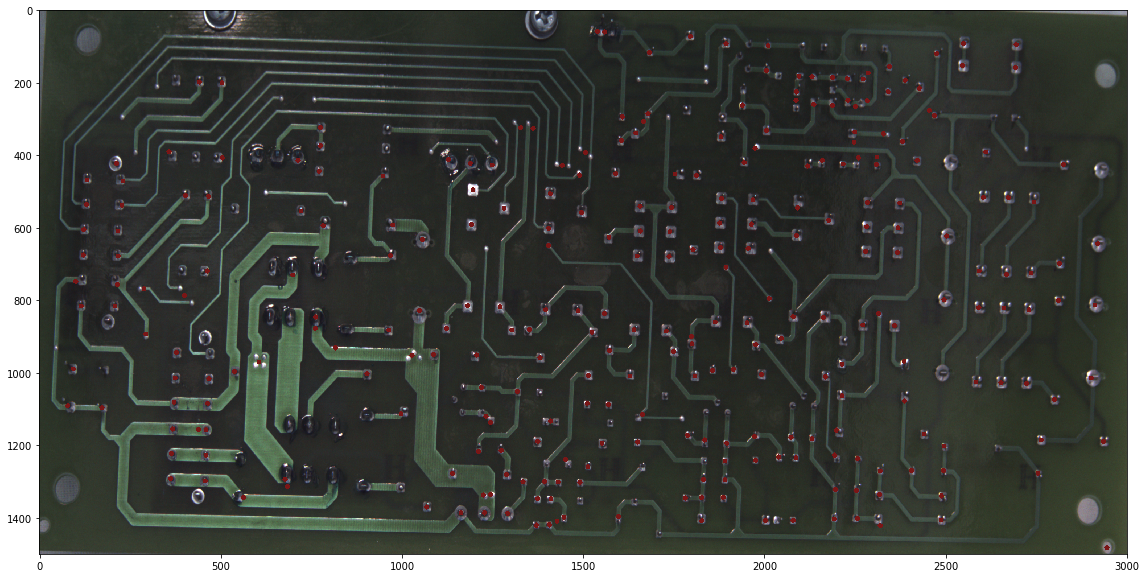

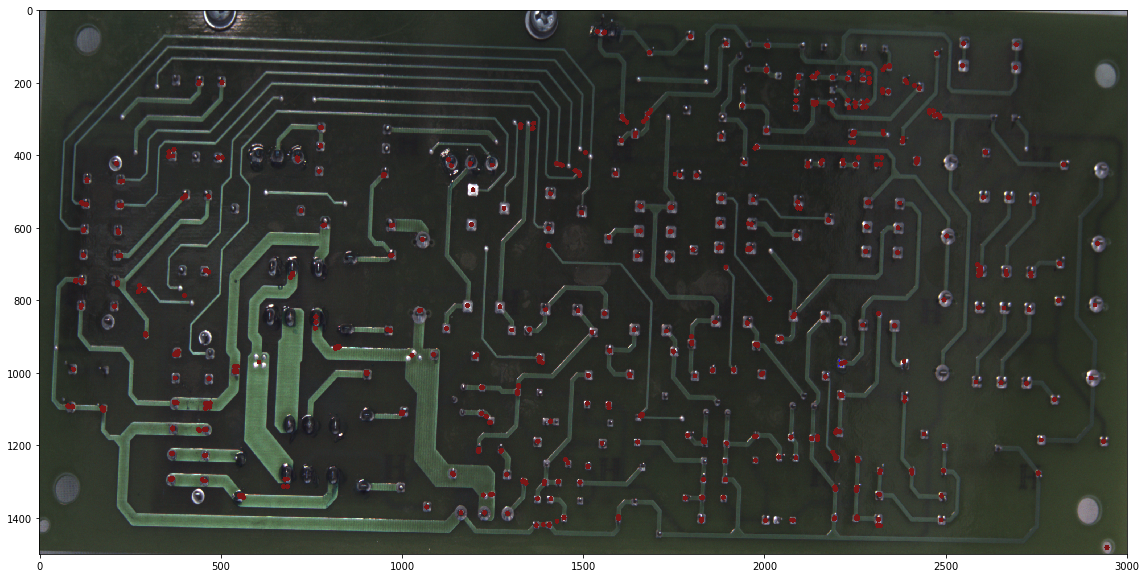

Centroid Count: 869


True

In [183]:
def draw_centroids(img, global_centroids):
    for gc in global_centroids:
        cv2.circle(img, (gc[1], gc[0]), 7, (122, 22, 22), -1)
    plt.imshow(img)
    plt.show()

draw_centroids(tf_original, gc_condensed)
draw_centroids(tf_marked, gc_marked)
print("Centroid Count:", len(gc_original))
cv2.imwrite(data_path+file_original[:-len(ext)]+"_circles_lths_green.JPG", tf_original)
cv2.imwrite(data_path+file_marked[:-len(ext)]+"_circles__lths_green.JPG", tf_marked)

In [15]:
def distance(A, B):
    return math.sqrt((A[0] - A[1])**2 + (B[0] - B[1])**2)

distances = []
for gcA in gc_original:
    for gcB in gc_marked:
        d = distance((gcA[0], gcA[1]), (gcB[0], gcB[1]))
        distances.append([str(gcA[2])+"_"+str(gcA[3]), str(gcB[2])+"_"+str(gcB[3]), d])

distances.sort(key = operator.itemgetter(2))

In [16]:
distances[:200]

[['(0, 0)_561', '(20, 40)_1173', 15.264337522473747],
 ['(20, 20)_510', '(20, 40)_1173', 19.849433241279208],
 ['(20, 40)_510', '(20, 40)_1173', 19.849433241279208],
 ['(0, 0)_561', '(40, 20)_510', 20.615528128088304],
 ['(0, 20)_561', '(20, 40)_1173', 21.400934559032695],
 ['(20, 0)_408', '(20, 40)_1173', 21.400934559032695],
 ['(20, 20)_510', '(40, 20)_510', 24.20743687382041],
 ['(20, 40)_510', '(40, 20)_510', 24.20743687382041],
 ['(0, 20)_561', '(40, 20)_510', 25.495097567963924],
 ['(20, 0)_408', '(40, 20)_510', 25.495097567963924],
 ['(0, 0)_561', '(40, 20)_715', 40.792156108742276],
 ['(20, 20)_510', '(40, 20)_715', 42.720018726587654],
 ['(20, 40)_510', '(40, 20)_715', 42.720018726587654],
 ['(0, 20)_561', '(40, 20)_715', 43.46262762420146],
 ['(20, 0)_408', '(40, 20)_715', 43.46262762420146],
 ['(0, 0)_561', '(40, 0)_408', 49.64876634922564],
 ['(20, 20)_510', '(40, 0)_408', 51.24451190127583],
 ['(20, 40)_510', '(40, 0)_408', 51.24451190127583],
 ['(0, 20)_561', '(40, 0)_408

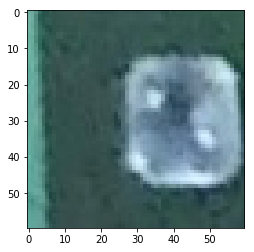

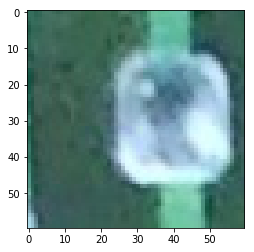

In [19]:
#distances
A = prefix_original+"40_0_662"+ext
plt.imshow(cv2.imread(A))
plt.show()
B = prefix_marked+"40_40_511"+ext
plt.imshow(cv2.imread(B))
plt.show()

#This is the last solder to correspondence 
# :. min distance is ~ 114

In [ ]:
#Delay the red detection part to here
#Once we have the mapping, check for red mark in B. if so then mark A as bad otherwise good 
#Check flowchart in journal 